# Wstep do projektu
-----------------------------------------------------
## Predykcja wyników w nauce - na podstawie danych demograficznych i społecznych
-----------------------------------------------------

CEL: Stworzenie modelu regresji liniowej przewidującego wyniki w nauce uczniów na podstawie danych demograficznych i społecznych.

DANE: "Student Performance Data Set", repozytorium UCI.
https://archive.ics.uci.edu/ml/datasets/student+performance#

EWALUACJA: MSE, R^2

-----------------------------------------------------
Fazy cyklu Data Science:


1.  Cel: precyzyjne zdefiniowanie rozwiązywanego problemu
2.  Dane: zdobycie danych do zrealizowania celu
3.  Wstępna ocena danych: ocena przydatności danych do rozwiązania problemu
4.  Przygotowanie danych: czyszczenie, transformacje, wzbogacanie, selekcja, etc.
5. Modelowanie: tworzenie modeli eksploracji danych (np. konkretne algorytmy uczenia maszynowego)
6. Ewaluacja: ocena i selekcja najlepszych modeli
7. Wdrożenie: komunikacja wyników i wniosków (często częściowo graficzna)
-----------------------------------------------------
Ten notatnik służy do przeprowadzenia faz 3-6.

Fazy 1 i 2 opisałam wyżej.
Fazę 7 przygotuję w latex-u, gdy skończę ewaluację i zbiorę wnioski.


In [ ]:
# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

# 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
# 2 sex - student's sex (binary: "F" - female or "M" - male)
# 3 age - student's age (numeric: from 15 to 22)
# 4 address - student's home address type (binary: "U" - urban or "R" - rural)
# 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
# 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
# 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
# 12 guardian - student's guardian (nominal: "mother", "father" or "other")
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# 16 schoolsup - extra educational support (binary: yes or no)
# 17 famsup - family educational support (binary: yes or no)
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# 19 activities - extra-curricular activities (binary: yes or no)
# 20 nursery - attended nursery school (binary: yes or no)
# 21 higher - wants to take higher education (binary: yes or no)
# 22 internet - Internet access at home (binary: yes or no)
# 23 romantic - with a romantic relationship (binary: yes or no)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
# 30 absences - number of school absences (numeric: from 0 to 93)

# # these grades are related with the course subject, Math or Portuguese:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

# Additional note: there are several (382) students that belong to both datasets . 
# These students can be identified by searching for identical attributes
# that characterize each student, as shown in the annexed R file.


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

df_mat['course'] = 'mat'
df_por['course'] = 'por'

df = pd.concat([df_mat, df_por]).reset_index(drop=True)

# Wstepna ocena danych

Tutaj bedziemy robic takie rzeczy jak:

1. Ile mamy jakich atrybutow, ile obserwacji
2. Czy sa null/NaN/None/flagi typu "unknown" itp + jakie mamy zakresy wartosci
3. Jak zmienne koreluja ze soba?
3. Czy mamy jakies nietypowe rozklady w danych
4. Czy mamy outliery

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,mat


## Ile mamy jakich atrybutow, ile obserwacji

In [ ]:
print(df.shape)

(1044, 34)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## Czy sa null/NaN/None/flagi typu "unknown" itp + jakie mamy zakresy wartosci


In [ ]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
course         2
dtype: int64

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64

In [ ]:
for c in df.columns:
  values = set(df[f'{c}'])
  print(f'Kolumna {c} przyjmuje wartosci: {values}')

Kolumna school przyjmuje wartosci: {'GP', 'MS'}
Kolumna sex przyjmuje wartosci: {'M', 'F'}
Kolumna age przyjmuje wartosci: {15, 16, 17, 18, 19, 20, 21, 22}
Kolumna address przyjmuje wartosci: {'R', 'U'}
Kolumna famsize przyjmuje wartosci: {'LE3', 'GT3'}
Kolumna Pstatus przyjmuje wartosci: {'T', 'A'}
Kolumna Medu przyjmuje wartosci: {0, 1, 2, 3, 4}
Kolumna Fedu przyjmuje wartosci: {0, 1, 2, 3, 4}
Kolumna Mjob przyjmuje wartosci: {'health', 'other', 'services', 'teacher', 'at_home'}
Kolumna Fjob przyjmuje wartosci: {'health', 'other', 'services', 'teacher', 'at_home'}
Kolumna reason przyjmuje wartosci: {'reputation', 'course', 'other', 'home'}
Kolumna guardian przyjmuje wartosci: {'other', 'father', 'mother'}
Kolumna traveltime przyjmuje wartosci: {1, 2, 3, 4}
Kolumna studytime przyjmuje wartosci: {1, 2, 3, 4}
Kolumna failures przyjmuje wartosci: {0, 1, 2, 3}
Kolumna schoolsup przyjmuje wartosci: {'no', 'yes'}
Kolumna famsup przyjmuje wartosci: {'no', 'yes'}
Kolumna paid przyjmuje wartos

Bedziemy chcieli w fazie przetwarzania znumeryzowac niektore zmienne, zapisze je ponizej


- zamiana "yes" na 1 oraz "no" na 0       dla wszystkich kolumn, wartosci
- Zamiana wartosci "MS" na 1, "GP" na 0   dla school
- Zamiana wartosci "F" na 1, "M" na 0     dla sex
- Zamiana wartosci "R" na 1, "U" na 0     dla address
- Zamiana wartosci "GT3" na 1, "LE3" na 0 dla famsize
- Zamiana wartosci "A" na 1, "T" na 0     dla Pstatus
- Zamiana wartosci "mat" na 1, "por" na 0     dla course

## Jak zmienne koreluja ze soba?

In [ ]:
corr = df.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


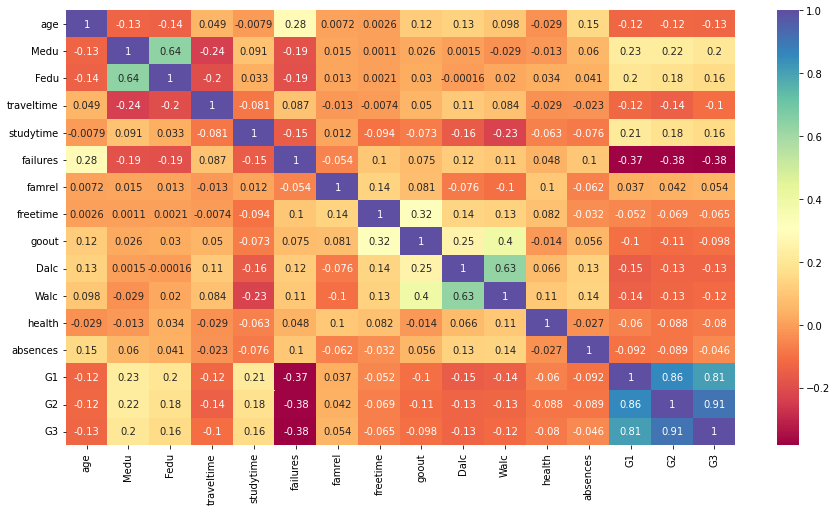

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="Spectral")

## Czy mamy jakies nietypowe rozklady w danych

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
len(df.columns)

34

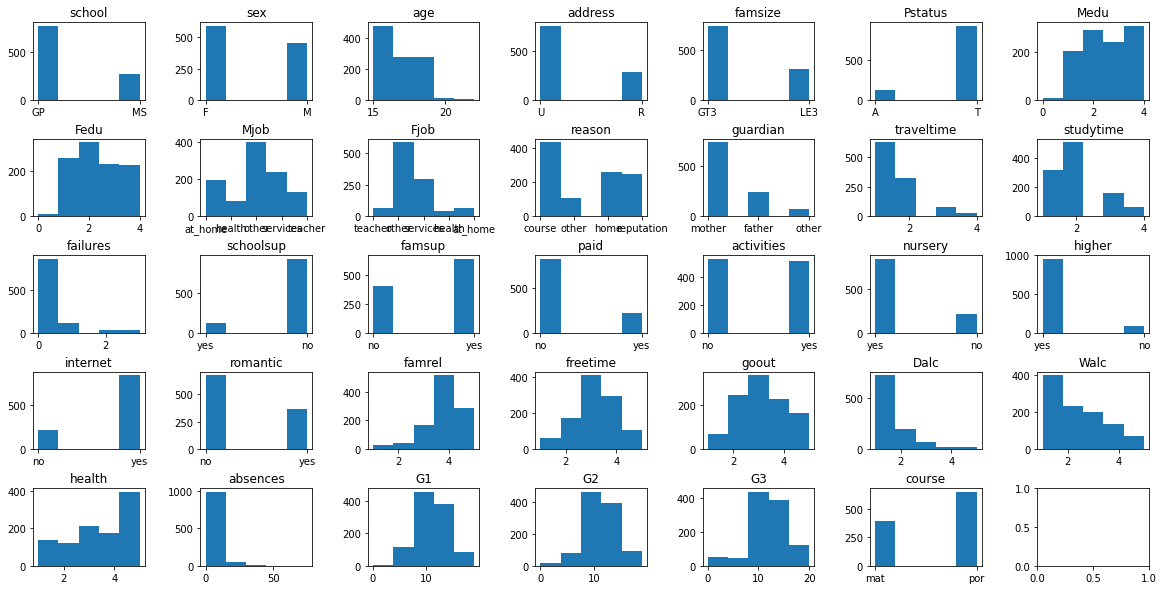

In [ ]:
# Tworzenie subplotów (5 wierszy, 7 kolumn)
fig, axs = plt.subplots(5, 7, figsize=(20, 10))

# Odstepy miedzy wykresami
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Rysowanie histogramów dla każdego atrybutu
for i, col in enumerate(df.columns):
    axs.flat[i].hist(df[col], bins=5)
    axs.flat[i].set_title(col)

plt.show()

## Czy mamy outliery

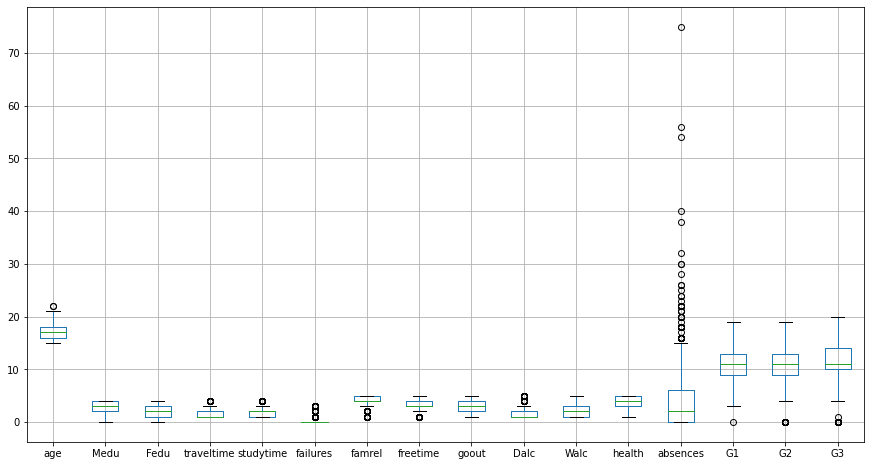

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df.boxplot()

## Wnioski po wstepnej ocenie danych
------------------------------------------------------------------

Dane pochodza z dwóch plików student-mat.csv i student-por.csv.
Zebrane zostały z dwóch szkół portugalskich przy wykorzystaniu formularzy i raportów szkolnych. 
Od dostawcy danych, wiemy, że istnieja studenci, ktorzy brali udzial w obu kursach (matematyka i jezyk portugalski) i takich studentow mozna zidentyfikowac po identycznym zestawie danych w obu plikach.


Mamy 1044 obesrwacji oraz 34 atrybuty w tym 16 liczbowych (int64) oraz 18 kategorycznych (object). Dane zajmuja ok 178 KB.


Dane sa kompletne - brak pustych wartosci/None/NaN, brak danych z flagami typu 'unknown'.

3 atrybuty numeryczne o wartosciach calkowitych 1-20 (G1, G2, G3) dotycza ocen uczniow z pierwszej i drugiej czesci okresu szkolnego oraz oceny finalnej. 

Chcielibysmy przewidywac G3, bez patrzenia na G1 i G2, mimo ze widzimy duza korelacje pomiedzy G1, G2 i G3 to przewidywanie oceny koncowej na podstawie ocen czastkowych wydaje sie byc malo ciekawe.

Po analizie korelacji widzac ze atrybuty Medu i Fedu oraz Walc i Dalc sa silnie skorelowane mozemy je "polaczyc" jako srednie.

Po analizie rozladow poszczegolnych atrybutow, chcemy usunac outliery w fazie przygotowania.

------------------------------------------------------------------





# Przygotowanie danych

Co planujemy w tej fazie?

1. Dodanie kolumny z info do ilu szkol uczeszcza student
4. Polaczenie atrybutow Medu i Fedu oraz Dalc i Walc poprzez srednia
3. Usuniecie niektorych atrybutow: Medu, Fedu, Dalc, Welc, G1, G2
2. Znumeryzowanie niektorych atrybutów kategorycznych
3. Ponowne sprawdzenie macierzy korelacji i ew. selekcja
3. Usuniecie outlierow ze wzgledu na atrybuty absences i age
5. Podzielenie danych na trenignowe i testowe
6. Skalowanie zbiorów trenigowego i testowego

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course'],
      dtype='object')


## Dodanie kolumny z info do ilu szkol uczeszcza student


In [ ]:
df["scount"] = df.groupby(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])["school"].transform("count")


In [ ]:
df[df['scount'] > 1].sort_values(by=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,scount
105,GP,F,15,U,GT3,A,3,3,other,health,reputation,father,1,4,0,yes,no,no,no,yes,yes,no,no,4,3,3,1,1,4,10,10,11,11,mat,2
500,GP,F,15,U,GT3,A,3,3,other,health,reputation,father,1,4,0,yes,no,no,no,yes,yes,no,no,4,3,3,1,1,4,10,10,10,10,por,2
84,GP,F,15,U,GT3,T,1,1,other,other,home,father,1,2,0,no,yes,no,yes,no,yes,yes,no,4,3,2,2,3,4,2,9,10,10,mat,2
479,GP,F,15,U,GT3,T,1,1,other,other,home,father,1,2,0,no,yes,no,yes,no,yes,yes,no,4,3,2,2,3,4,2,13,12,12,por,2
87,GP,F,15,U,GT3,T,4,2,other,other,reputation,mother,1,3,0,no,yes,no,yes,yes,yes,yes,no,5,3,3,1,3,1,4,13,14,14,mat,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,MS,F,18,U,LE3,T,1,1,at_home,services,course,father,2,3,0,no,no,no,no,yes,yes,yes,no,5,3,2,1,1,4,0,19,17,18,por,2
353,MS,M,19,R,GT3,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,4,4,4,3,3,5,4,8,8,8,mat,2
975,MS,M,19,R,GT3,T,1,1,other,other,home,other,3,1,1,no,yes,no,no,yes,yes,yes,no,4,4,4,3,3,5,4,8,9,10,por,2
383,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,6,5,0,mat,2


## Polaczenie atrybutow Medu i Fedu oraz Dalc i Walc poprzez srednia

In [ ]:
df['Pedu'] = df.apply(lambda x: (x['Medu'] + x['Fedu'])/2, axis=1)
df['alc'] = df.apply(lambda x: (x['Dalc'] + x['Walc'])/2, axis=1)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,scount,Pedu,alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mat,1,4.0,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,mat,1,1.0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mat,1,1.0,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mat,1,3.0,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,mat,1,3.0,1.5


## Usuniecie niektorych atrybutow: Medu, Fedu, Dalc, Walc, G1, G2

In [ ]:
col_to_drop = ['Medu', 'Fedu', 'Dalc', 'Walc', 'G1', 'G2']

df = df.drop(col_to_drop, axis=1)

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G3', 'course', 'scount', 'Pedu', 'alc'],
      dtype='object')

## Znumeryzowanie atrybutów kategorycznych.

In [ ]:
# Zamiana wartosci "yes" na 1 i "no" na 0
df = df.replace({"yes": 1, "no": 0})

# Zamiana wartosci "MS" na 1, "GP" na 0
df["school"] = df["school"].replace({"MS": 1, "GP": 0})

# Zamiana wartosci "F" na 1, "M" na 0
df["sex"] = df["sex"].replace({"F": 1, "M": 0})

# Zamiana wartosci "R" na 1, "U" na 0
df["address"] = df["address"].replace({"R": 1, "U": 0})

# Zamiana wartosci "GT3" na 1, "LE3" na 0
df["famsize"] = df["famsize"].replace({"GT3": 1, "LE3": 0})

# Zamiana wartosci "A" na 1, "T" na 0
df["Pstatus"] = df["Pstatus"].replace({"A": 1, "T": 0})

# Zamiana wartosci "mat" na 1, "por" na 0   
df["course"] = df["course"].replace({"mat": 1, "por": 0})


## Ponowne sprawdzenie macierzy korelacji

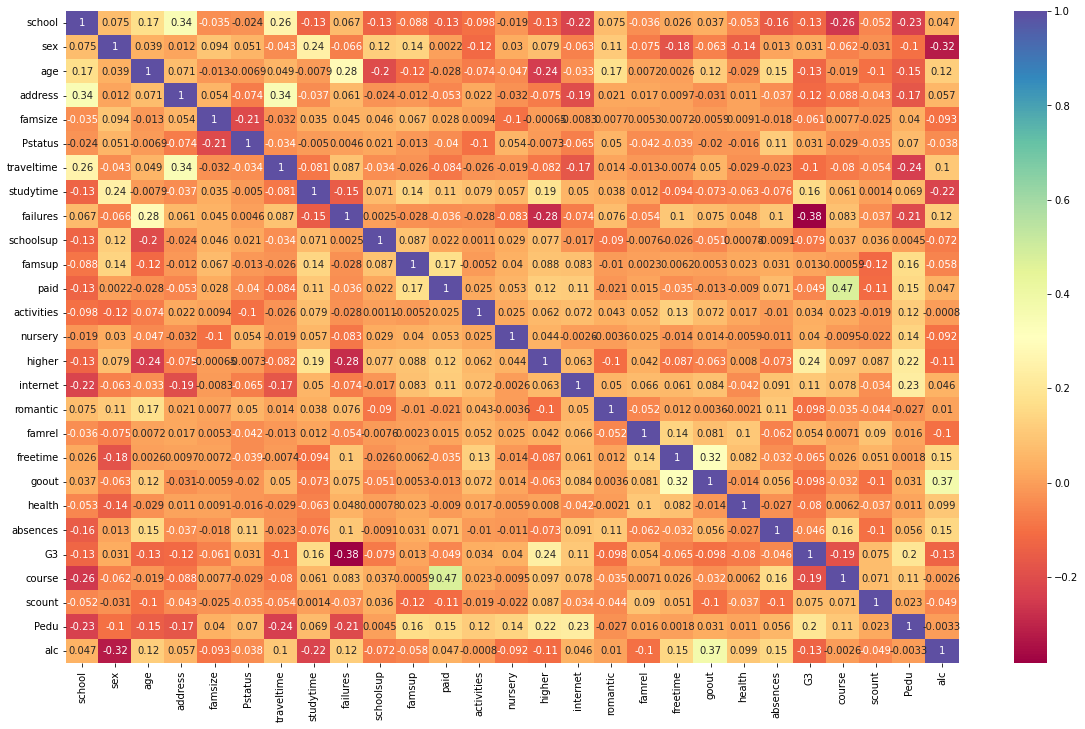

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="Spectral")

## Usuniecie outlierow

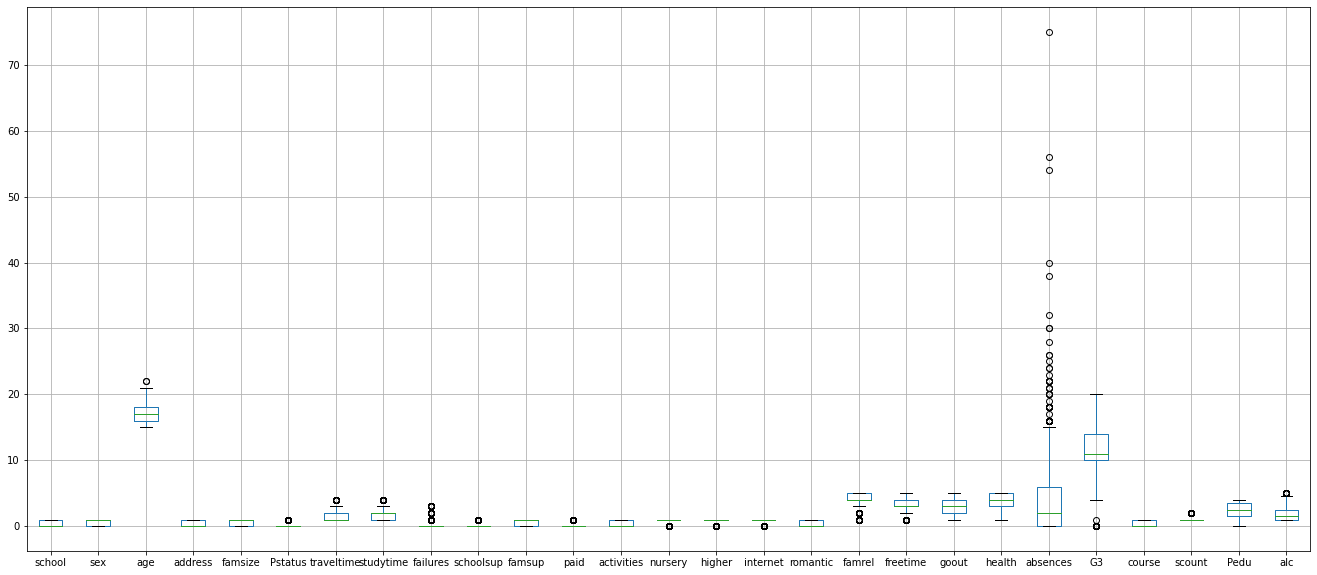

In [ ]:
# ponownie spojrzmy na wykresy pudelkowe, po usuniecu zbednych danych i dodaniu kategorycznych po znumeryzowaniu

plt.figure(figsize=(23,10))
df.boxplot()

In [ ]:
# Definiujemy rezstepy miedzykwartylowe
col_to_drop_outliers = ['age', 'absences']

Q1= df[col_to_drop_outliers].quantile(0.25)
Q3= df[col_to_drop_outliers].quantile(0.75)

IQR= Q3-Q1

print(IQR)

age         2.0
absences    6.0
dtype: float64


In [ ]:
# lower bound (lb) i upper bounds (ub)
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)

lb.absences

-9.0

In [ ]:
size_before = df.shape[0]
df = df[df.absences.between(lb.absences, ub.absences) & df.age.between(lb.age, ub.age)]
size_after = df.shape[0]

print(f'zmniejszylismy liczbe obserwacji z {size_before} na {size_after}')

zmniejszylismy liczbe obserwacji z 1044 na 989


In [ ]:
df = df.reset_index(drop = True)

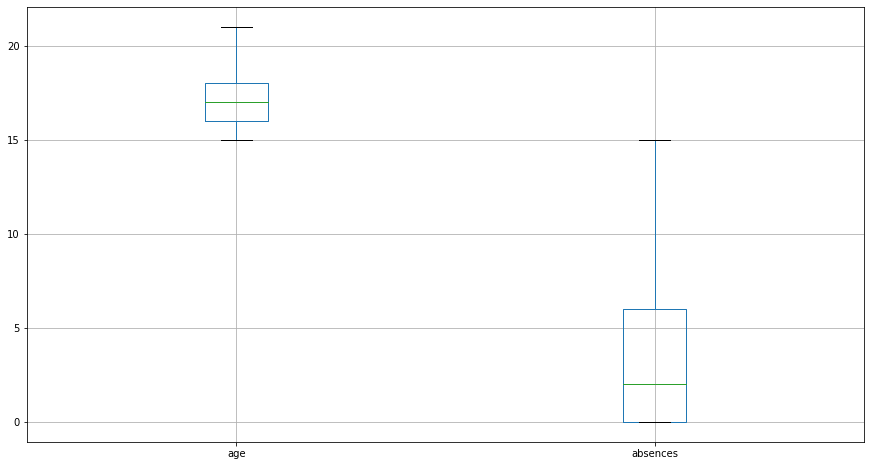

In [ ]:
# Ponowanie spojrzmy na wykresy pudelkowe

plt.figure(figsize=(15,8))
df[['age', 'absences']].boxplot()

## Zachowanie jedynie danych numerycznych

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      989 non-null    int64  
 1   sex         989 non-null    int64  
 2   age         989 non-null    int64  
 3   address     989 non-null    int64  
 4   famsize     989 non-null    int64  
 5   Pstatus     989 non-null    int64  
 6   Mjob        989 non-null    object 
 7   Fjob        989 non-null    object 
 8   reason      989 non-null    object 
 9   guardian    989 non-null    object 
 10  traveltime  989 non-null    int64  
 11  studytime   989 non-null    int64  
 12  failures    989 non-null    int64  
 13  schoolsup   989 non-null    int64  
 14  famsup      989 non-null    int64  
 15  paid        989 non-null    int64  
 16  activities  989 non-null    int64  
 17  nursery     989 non-null    int64  
 18  higher      989 non-null    int64  
 19  internet    989 non-null    i

In [ ]:
df_copy = df

df = df.drop(['guardian', 'reason', 'Mjob', 'Fjob'], axis=1)

## Podzielenie danych na trenignowe i testowe

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G3,course,scount,Pedu,alc
0,0,1,18,0,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,6,1,1,4.0,1.0
1,0,1,17,0,1,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,6,1,1,1.0,1.0
2,0,1,15,0,0,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,10,1,1,1.0,2.5
3,0,1,15,0,1,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,15,1,1,3.0,1.0
4,0,1,16,0,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,10,1,1,3.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,1,1,19,1,1,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,5,4,10,0,1,2.5,1.5
985,1,1,18,0,0,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,4,16,0,1,2.0,1.0
986,1,1,18,0,1,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,5,6,9,0,1,1.0,1.0
987,1,0,17,0,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,2,6,10,0,1,2.0,3.5


In [ ]:
from sklearn.model_selection import train_test_split

X = df[[c for c in df.columns if c != 'G3']]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.describe()

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,course,scount,Pedu,alc
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000
mean,0.271808,0.573957,16.670038,0.283186,0.692794,0.121365,1.538559,1.979772,0.240202,0.117573,0.616941,0.209861,0.498104,0.801517,0.91909,0.781290,0.350190,3.920354,3.190898,3.134008,3.542351,3.413401,0.370417,1.08091,2.500632,1.845765
std,0.445173,0.494813,1.202782,0.450831,0.461627,0.326758,0.745089,0.850671,0.626788,0.322305,0.486440,0.407467,0.500313,0.399110,0.27287,0.413633,0.477331,0.958627,1.020160,1.143941,1.410777,3.768258,0.483222,0.27287,1.022066,0.971547
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.500000,1.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.00000,1.500000,1.000000
50%,0.000000,1.000000,17.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,0.000000,1.00000,2.500000,1.500000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,6.000000,1.000000,1.00000,3.500000,2.500000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,15.000000,1.000000,2.00000,4.000000,5.000000


## Skalowanie zbiorów trenigowego i testowego

In [ ]:
# skorzystam z transformacji min-max poniewaz dane treningowe i testowe pochodza z tego samego zrodla
# nie spodziewam sie zeby min i max ulegalo znaczacej zmianie, rozklady poszczegolnych zmiennych sa stabilne
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
num_vars = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'scount', 'Pedu', 'alc']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# uzywamy tych samych parametrow do standaryzacji danych testowych
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
X_train.describe()

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,course,scount,Pedu,alc
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000
mean,0.271808,0.573957,0.278340,0.283186,0.692794,0.121365,0.179520,0.326591,0.080067,0.117573,0.616941,0.209861,0.498104,0.801517,0.91909,0.781290,0.350190,0.730088,0.547724,0.533502,0.635588,0.227560,0.370417,0.08091,0.571609,0.211441
std,0.445173,0.494813,0.200464,0.450831,0.461627,0.326758,0.248363,0.283557,0.208929,0.322305,0.486440,0.407467,0.500313,0.399110,0.27287,0.413633,0.477331,0.239657,0.255040,0.285985,0.352694,0.251217,0.483222,0.27287,0.292019,0.242887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.750000,0.500000,0.250000,0.500000,0.000000,0.000000,0.00000,0.285714,0.000000
50%,0.000000,1.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.750000,0.500000,0.500000,0.750000,0.133333,0.000000,0.00000,0.571429,0.125000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.750000,0.750000,1.000000,0.400000,1.000000,0.00000,0.857143,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Modelowanie

Co planujemy w tej fazie?

1. Model regresji liniowej wielorakiej
2. Selekcja atrybutów przy użyciu RFE (zejsc z 26 do 15 atrybutów)
3. Iteracyjna selekcja kolejnych atrybutów opierajac sie i p-value

A co jeśli regresja liniowa nie będzie sobie radzić?
1. Modelowanie lasu losowego
2. Modelowanie regreaji logistycznej (dla uproszczonego problemu)



## Model regresji liniowej wielorakiej



In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Selekcja atrybutów przy użyciu RFE 
(zejsc z 26 do 15 atrybutów)

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# lista atrybutow i ich istotnosc, te z 1 zostaja
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('school', True, 1),
 ('sex', False, 6),
 ('age', False, 7),
 ('address', False, 4),
 ('famsize', False, 2),
 ('Pstatus', False, 12),
 ('traveltime', True, 1),
 ('studytime', True, 1),
 ('failures', True, 1),
 ('schoolsup', True, 1),
 ('famsup', False, 5),
 ('paid', True, 1),
 ('activities', False, 11),
 ('nursery', False, 10),
 ('higher', True, 1),
 ('internet', False, 3),
 ('romantic', True, 1),
 ('famrel', False, 8),
 ('freetime', False, 9),
 ('goout', True, 1),
 ('health', True, 1),
 ('absences', True, 1),
 ('course', True, 1),
 ('scount', True, 1),
 ('Pedu', True, 1),
 ('alc', True, 1)]

In [ ]:
# zostaja atrybuty:
col = X_train.columns[rfe.support_]
col

Index(['school', 'traveltime', 'studytime', 'failures', 'schoolsup', 'paid',
       'higher', 'romantic', 'goout', 'health', 'absences', 'course', 'scount',
       'Pedu', 'alc'],
      dtype='object')

In [ ]:
# du usuniecia ida atrybuty:
X_train.columns[~rfe.support_]

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'famsup', 'activities',
       'nursery', 'internet', 'famrel', 'freetime'],
      dtype='object')

In [ ]:
# do dalszego modelowania bierzemy zbior atrybutow:
X_train_rfe = X_train[col]

X_train_rfe.describe()

,school,traveltime,studytime,failures,schoolsup,paid,higher,romantic,goout,health,absences,course,scount,Pedu,alc
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000,791.000000,791.000000,791.000000,791.00000,791.000000,791.000000
mean,0.271808,0.179520,0.326591,0.080067,0.117573,0.209861,0.91909,0.350190,0.533502,0.635588,0.227560,0.370417,0.08091,0.571609,0.211441
std,0.445173,0.248363,0.283557,0.208929,0.322305,0.407467,0.27287,0.477331,0.285985,0.352694,0.251217,0.483222,0.27287,0.292019,0.242887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.250000,0.500000,0.000000,0.000000,0.00000,0.285714,0.000000
50%,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.00000,0.000000,0.500000,0.750000,0.133333,0.000000,0.00000,0.571429,0.125000
75%,1.000000,0.333333,0.333333,0.000000,0.000000,0.000000,1.00000,1.000000,0.750000,1.000000,0.400000,1.000000,0.00000,0.857143,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##  Iteracyjna selekcja kolejnych atrybutów
 opierajac sie na p-value

In [ ]:
# Sprawdzamy p-values wszystkich wspolczynnikow aktualnego modelu
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.29
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           6.42e-42
Time:                        15:22:44   Log-Likelihood:                -2060.3
No. Observations:                 791   AIC:                             4153.
Df Residuals:                     775   BIC:                             4227.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9150      0.636     18.747      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# atrybut alc ma najwyzsze p-value, usuwamy
X_train_new = X_train_rfe.drop(["alc"], axis = 1)

# nowy model
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     19.54
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           2.10e-42
Time:                        15:22:44   Log-Likelihood:                -2060.7
No. Observations:                 791   AIC:                             4151.
Df Residuals:                     776   BIC:                             4222.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9039      0.635     18.735      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# atrybut traveltime ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["traveltime"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     20.85
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.29e-42
Time:                        15:22:44   Log-Likelihood:                -2061.8
No. Observations:                 791   AIC:                             4152.
Df Residuals:                     777   BIC:                             4217.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7459      0.627     18.737      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# atrybut paid ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["paid"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     22.40
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           6.57e-43
Time:                        15:22:44   Log-Likelihood:                -2062.8
No. Observations:                 791   AIC:                             4152.
Df Residuals:                     778   BIC:                             4212.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7151      0.627     18.689      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# atrybut absences ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["absences"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     24.12
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           5.10e-43
Time:                        15:22:44   Log-Likelihood:                -2064.2
No. Observations:                 791   AIC:                             4152.
Df Residuals:                     779   BIC:                             4209.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8617      0.622     19.085      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# atrybut scount ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["scount"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.36e-43
Time:                        15:22:44   Log-Likelihood:                -2065.6
No. Observations:                 791   AIC:                             4153.
Df Residuals:                     780   BIC:                             4205.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9401      0.620     19.252      0.0

In [ ]:
# atrybut health ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["health"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     28.41
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           7.38e-43
Time:                        15:22:44   Log-Likelihood:                -2068.2
No. Observations:                 791   AIC:                             4156.
Df Residuals:                     781   BIC:                             4203.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4453      0.582     19.658      0.0

In [ ]:
# atrybut goout ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["goout"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     31.02
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           2.28e-42
Time:                        15:22:44   Log-Likelihood:                -2071.2
No. Observations:                 791   AIC:                             4160.
Df Residuals:                     782   BIC:                             4202.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8620      0.533     20.397      0.0

In [ ]:
# atrybut Pedu ma najwyzsze p-value, usuwamy
X_train_new = X_train_new.drop(["Pedu"], axis = 1)

# nowy model 
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     34.35
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           7.43e-42
Time:                        15:22:44   Log-Likelihood:                -2074.3
No. Observations:                 791   AIC:                             4165.
Df Residuals:                     783   BIC:                             4202.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3438      0.497     22.804      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Dane testowe okrajam do atrybutów wyselekcjonowanych przy modelowaniu regresji liniowej

# X_train_lm2.columns
X_test_lin = X_test[['school', 'studytime', 'failures', 'schoolsup', 'higher','romantic', 'course']]

# dodajemy kolumnę jedynek do zbioru testowego
X_test_lin = sm.add_constant(X_test_lin)

# Predykcja
y_pred_lin = lr2.predict(X_test_lin)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Prawdopodobnie regresja liniowa nie wystarczy

Po wykonaniu powyzszych czynnosci, widzimy ze model jest slabo dopasowany juz na danych treningowych. 

Dla kazdej zmiennej mamy p-value < 0.05, natomiast R^2 = 0.235, co oznacza, ze zmienne slabo opisuja decyzje y.

W takim wypadku spróbujemy zaimplementować model lasu losowego.

Dodatkowo sprawdzimy czy model regresji logistycznej poradzi sobie z predykcja zdawalnosci uczniow, gdzie zdanie to "G3 >= 11", poniewaz uczniowie mogli miec max 20.

## Model lasu losowego

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Wezmy dane przygotowane wczesniej w ramach regresji liniowej, sa juz odsiane od outlierow i przeskalowane

# Tworzymy model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenujemy model na danych treningowych
rf_model.fit(X_train, y_train)


# Predykcja
y_pred_rf = rf_model.predict(X_test)


## Model regresji logistycznej

In [ ]:
# Wezmy dane przygotowane wczesniej, sa juz odsiane od outlierow i przeskalowane

# Roznica jest taka, ze bedziemy chcieli przewidziec czy y >= 11, zatem:
y_train_log =  y_train.apply(lambda x: 1 if x >= 11 else 0)
y_test_log =  y_test.apply(lambda x: 1 if x >= 11 else 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tworzymy model
logreg = LogisticRegression()

# Trenujemy model na danych treningowych
logreg.fit(X_train, y_train_log)

# Predykcja
y_pred_log = logreg.predict(X_test)

# Ewaluacja

Co planujemy w tej fazie?

1. Ewaluacja modelu regresji liniowej (MSE, R2, MAE, RMSE)
2. Ewaluacja modelu lasu losowego (MSE, R2, MAE, RMSE)
3. Ewaluacja modelu regresji logistycznej problemu predykcji zdawalnosci (Accuracy, Confusion Matrix, Classification Report)

## Ewaluacja modelu regresji liniowej 
(MSE, R2, MAE, RMSE)

---------Ewaluacja modelu regresji liniowej----------
MSE: 13.257611819856566
R2: 0.2552306897345249
MAE: 2.636519708274501
RMSE: 3.641100358388459


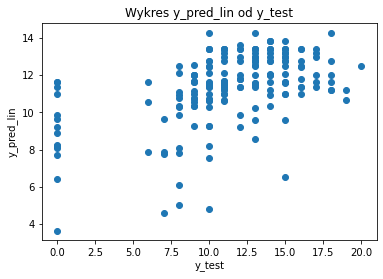

In [66]:
# regresja liniowa
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ewaluacja
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)
mae = mean_absolute_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)

print('---------Ewaluacja modelu regresji liniowej----------')
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

# Wizualizacja
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lin)
plt.xlabel('y_test')
plt.ylabel('y_pred_lin')
plt.title('Wykres y_pred_lin od y_test')
plt.show()

## Ewaluacja modelu lasu losowego 
(MSE, R2, MAE, RMSE)

---------Ewaluacja modelu lasu losowego----------
MSE: 9.78541919191919
R2: 0.4502871255206923
MAE: 2.365959595959596
RMSE: 3.128165467477574


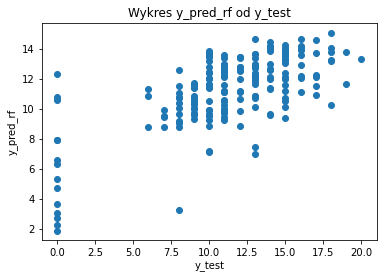

In [67]:
# las losowy

# Ewaluacja
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)


print('---------Ewaluacja modelu lasu losowego----------')
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

# Wizualizacja
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.xlabel('y_test')
plt.ylabel('y_pred_rf')
plt.title('Wykres y_pred_rf od y_test')
plt.show()

## Ewaluacja modelu regresji logistycznej problemu predykcji zdawalnosci 
(Accuracy, Confusion Matrix, Classification Report)

In [68]:
# regresja logistyczna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ewaluacja
acc = accuracy_score(y_test_log, y_pred_log)
conf_mat = confusion_matrix(y_test_log, y_pred_log)
class_rep = classification_report(y_test_log, y_pred_log)


print('---------Ewaluacja modelu regresji logistycznej----------')
print("\nAccuracy:\n", acc)
print("\nConfusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", class_rep)

---------Ewaluacja modelu regresji logistycznej----------

Accuracy:
 0.7626262626262627

Confusion Matrix:
 [[ 36  38]
 [  9 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.49      0.61        74
           1       0.75      0.93      0.83       124

    accuracy                           0.76       198
   macro avg       0.78      0.71      0.72       198
weighted avg       0.77      0.76      0.75       198

